In [1]:
""" ECGR 5105 Intro to Machine Learning
    Homework 1
    Phillip Harmon """;


In [2]:
""" Part 1a : numeric data raw input """
%reset -f


In [3]:
#Module Inclusions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split


In [4]:
#Function to calculate the loss of a model
def get_loss(x, y, theta):
    """x is input data (m x n)
       y is ground truths (m x 1)
       theta is model params (n x 1)"""
    h = x.dot(theta)
    error = np.subtract(h, y)
    sqError = np.square(error)
    sumSqError = np.sum(sqError)
    avgSqError = sumSqError /(2 * len(y)) 
    return avgSqError


In [5]:
#Function to run the gradient descent algorithm
def gradient_descent(xT, yT, theta, a, iterations, xV, yV):
    """xT is input training data (m x n)
       yT is training ground truths (m x 1)
       theta is model params (n x 1)
       a is learn rate (scalar)
       iterations. duh. (scalar)
       xV is input vaidatation data
       yV is validation ground truths """
    tLoss = np.zeros(iterations)
    vLoss = np.zeros(iterations)
    for i in range(iterations):
        h = xT.dot(theta)
        error = np.subtract(h, yT)
        delta = xT.transpose().dot(error)
        grad = delta / len(yT) 
        theta = theta - (a * grad)
        tLoss[i] = get_loss(xT, yT, theta)
        vLoss[i] = get_loss(xV, yV, theta)
    return theta, tLoss, vLoss


In [6]:
#Read in the CSV into a dataframe
csvData = pd.read_csv("./Housing.csv")

csvCols = len(csvData.columns)
csvRows = len(csvData)

csvData.head(5)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
#Collect Data
dataLabels = ['price','area','bedrooms','bathrooms','stories','parking']
data = csvData[dataLabels]
data.head(5)


,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [8]:
#Split T-set and V-set
#and
#Prepare the training set for Gradient Descent
np.random.seed(1337)
frameT, frameV = train_test_split(data, train_size = 0.8, test_size = 0.2)
n = len(frameT.columns)
m = len(frameT)
nV = len(frameV.columns)
mV = len(frameV)
Yv = frameV.pop('price')
Xv = frameV
Y = frameT.pop('price')
X = frameT
print(X.head(5))
Y.head(5)


      area  bedrooms  bathrooms  stories  parking
536   3420         5          1        2        0
420   4120         2          1        2        0
63    6360         4          2        3        2
465   3800         2          1        1        0
277  10360         2          1        1        1


536    1960000
420    3360000
63     7035000
465    3045000
277    4305000
Name: price, dtype: int64

In [9]:
Yv = Yv.values[:].reshape([mV,1])
Xv = np.hstack((np.ones((mV,1)), Xv.values[:,:].reshape([mV,nV-1])))
Y = Y.values[:].reshape([m,1])
X = np.hstack((np.ones((m,1)), X.values[:,:].reshape([m,n-1])))
print(X[0:5])
Y[0:5]


[[1.000e+00 3.420e+03 5.000e+00 1.000e+00 2.000e+00 0.000e+00]
 [1.000e+00 4.120e+03 2.000e+00 1.000e+00 2.000e+00 0.000e+00]
 [1.000e+00 6.360e+03 4.000e+00 2.000e+00 3.000e+00 2.000e+00]
 [1.000e+00 3.800e+03 2.000e+00 1.000e+00 1.000e+00 0.000e+00]
 [1.000e+00 1.036e+04 2.000e+00 1.000e+00 1.000e+00 1.000e+00]]


array([[1960000],
       [3360000],
       [7035000],
       [3045000],
       [4305000]], dtype=int64)

In [10]:
#set up gradient descent
LEARN_RATE = 0.00000005
ITERATIONS = 100000
#init theta
theta = np.zeros((n,1))
theta


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [11]:
#Perform the Gradient Descent on the data
theta, lossT, lossV = gradient_descent(X,Y,theta,LEARN_RATE,ITERATIONS,Xv,Yv)
print("Converged Training Loss J = {:.3f}".format(lossT[-1]))
print("Final Validation Loss J = {:.3f}".format(lossV[-1]))


Converged Training Loss J = 1623129367757.338
Final Validation Loss J = 1776922667857.647


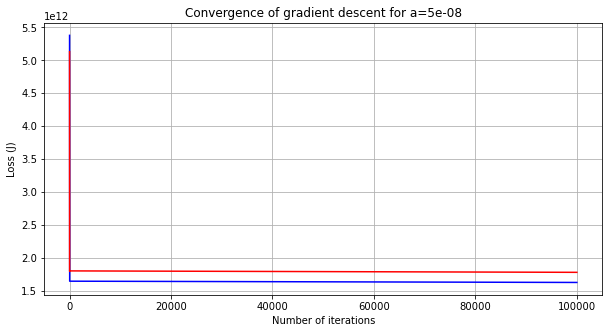

In [12]:
#Plot loss over training interval
plt.rcParams["figure.figsize"] = (10,5)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent for a={}'.format(LEARN_RATE))
plt.plot(range(1,ITERATIONS+1),lossT, color='blue')
plt.plot(range(1,ITERATIONS+1),lossV, color='red')


In [13]:
""" Part 1b : numeric and boolean data with raw input """
%reset -f


In [14]:
#Module Inclusions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split


In [15]:
#Function to calculate the loss of a model
def get_loss(x, y, theta):
    """x is input data (m x n)
       y is ground truths (m x 1)
       theta is model params (n x 1)"""
    h = x.dot(theta)
    error = np.subtract(h, y)
    sqError = np.square(error)
    sumSqError = np.sum(sqError)
    avgSqError = sumSqError /(2 * len(y)) 
    return avgSqError


In [16]:
#Function to run the gradient descent algorithm
def gradient_descent(xT, yT, theta, a, iterations, xV, yV):
    """xT is input training data (m x n)
       yT is training ground truths (m x 1)
       theta is model params (n x 1)
       a is learn rate (scalar)
       iterations. duh. (scalar)
       xV is input vaidatation data
       yV is validation ground truths """
    tLoss = np.zeros(iterations)
    vLoss = np.zeros(iterations)
    for i in range(iterations):
        h = xT.dot(theta)
        error = np.subtract(h, yT)
        delta = xT.transpose().dot(error)
        grad = delta / len(yT) 
        theta = theta - (a * grad)
        tLoss[i] = get_loss(xT, yT, theta)
        vLoss[i] = get_loss(xV, yV, theta)
    return theta, tLoss, vLoss


In [17]:
#Function to convert Y/N booleans into 1/0 booleans
def yn_bool_convert(val):
    return val.map({ "yes" : 1 , "no" : 0 })


In [18]:
#Read in the CSV into a dataframe
csvData = pd.read_csv("./Housing.csv")

csvCols = len(csvData.columns)
csvRows = len(csvData)

csvData.head(5)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [19]:
#Collect numeric data
dataLabels = ['price','area','bedrooms','bathrooms','stories','parking']
data = csvData[dataLabels]
data


,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [20]:
#Collect boolean data
boolLabels = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
boolData = csvData[boolLabels]
boolData


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [21]:
#Convert Y/N booleans to numerical booleans
boolData = boolData.apply(yn_bool_convert)
boolData


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [22]:
#Join datasets
newdata = pd.concat([data,boolData],axis=1,join='outer')
newdata


,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,13300000,7420,4,2,3,2,1,0,0,0,1,1
1,12250000,8960,4,4,4,3,1,0,0,0,1,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,1,0,1,0,1,1
4,11410000,7420,4,1,2,2,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0


In [23]:
#Split T-set and V-set
#and
#Prepare the training set for Gradient Descent
np.random.seed(1337)
frameT, frameV = train_test_split(newdata, train_size = 0.8, test_size = 0.2)
n = len(frameT.columns)
m = len(frameT)
nV = len(frameV.columns)
mV = len(frameV)
Yv = frameV.pop('price')
Xv = frameV
Y = frameT.pop('price')
X = frameT
print(Y.head(5))
X.head(5)


536    1960000
420    3360000
63     7035000
465    3045000
277    4305000
Name: price, dtype: int64


,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
536,3420,5,1,2,0,0,0,0,0,0,0
420,4120,2,1,2,0,1,0,0,0,0,0
63,6360,4,2,3,2,1,0,0,0,1,1
465,3800,2,1,1,0,1,0,0,0,0,0
277,10360,2,1,1,1,1,0,0,0,0,1


In [24]:
Yv = Yv.values[:].reshape([mV,1])
Xv = np.hstack((np.ones((mV,1)), Xv.values[:,:].reshape([mV,nV-1])))
Y = Y.values[:].reshape([m,1])
X = np.hstack((np.ones((m,1)), X.values[:,:].reshape([m,n-1])))
print(X[0:5])
Y[0:5]


[[1.000e+00 3.420e+03 5.000e+00 1.000e+00 2.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 4.120e+03 2.000e+00 1.000e+00 2.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 6.360e+03 4.000e+00 2.000e+00 3.000e+00 2.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 3.800e+03 2.000e+00 1.000e+00 1.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 1.036e+04 2.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00]]


array([[1960000],
       [3360000],
       [7035000],
       [3045000],
       [4305000]], dtype=int64)

In [25]:
#set up gradient descent
LEARN_RATE = 0.00000005
ITERATIONS = 100000
#init theta
theta = np.zeros((n,1))
theta


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [26]:
#Perform the Gradient Descent on the data
theta, lossT, lossV = gradient_descent(X,Y,theta,LEARN_RATE,ITERATIONS,Xv,Yv)
print("Converged Training Loss J = {:.3f}".format(lossT[-1]))
print("Final Validation Loss J = {:.3f}".format(lossV[-1]))


Converged Training Loss J = 1621627742447.651
Final Validation Loss J = 1775353873614.621


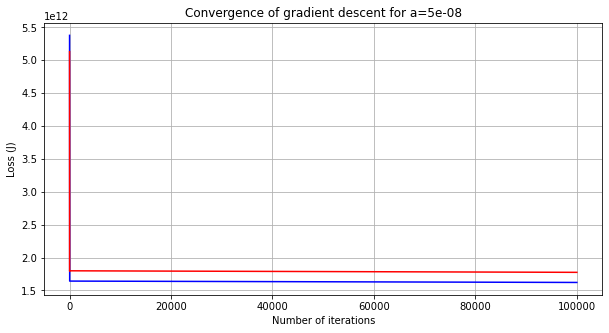

In [27]:
#Plot loss over training interval
plt.rcParams["figure.figsize"] = (10,5)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent for a={}'.format(LEARN_RATE))
plt.plot(range(1,ITERATIONS+1),lossT, color='blue')
plt.plot(range(1,ITERATIONS+1),lossV, color='red')


In [28]:
""" Part 2a : numeric data with standardization and normalization """
%reset -f


In [29]:
#Module Inclusions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn_pandas import DataFrameMapper


In [30]:
#Function to calculate the loss of a model
def get_loss(x, y, theta):
    """x is input data (m x n)
       y is ground truths (m x 1)
       theta is model params (n x 1)"""
    h = x.dot(theta)
    error = np.subtract(h, y)
    sqError = np.square(error)
    sumSqError = np.sum(sqError)
    avgSqError = sumSqError /(2 * len(y)) 
    return avgSqError


In [31]:
#Function to run the gradient descent algorithm
def gradient_descent(xT, yT, theta, a, iterations, xV, yV):
    """xT is input training data (m x n)
       yT is training ground truths (m x 1)
       theta is model params (n x 1)
       a is learn rate (scalar)
       iterations. duh. (scalar)
       xV is input vaidatation data
       yV is validation ground truths """
    tLoss = np.zeros(iterations)
    vLoss = np.zeros(iterations)
    for i in range(iterations):
        h = xT.dot(theta)
        error = np.subtract(h, yT)
        delta = xT.transpose().dot(error)
        grad = delta / len(yT) 
        theta = theta - (a * grad)
        tLoss[i] = get_loss(xT, yT, theta)
        vLoss[i] = get_loss(xV, yV, theta)
    return theta, tLoss, vLoss


In [32]:
#Read in the CSV into a dataframe
csvData = pd.read_csv("./Housing.csv")

csvCols = len(csvData.columns)
csvRows = len(csvData)

csvData.head(5)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [33]:
#Collect Data
dataLabels = ['price','area','bedrooms','bathrooms','stories','parking']
data = csvData[dataLabels]
data.head(5)


,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [34]:
#Split T-set and V-set
np.random.seed(1337)
frameT, frameV = train_test_split(data, train_size = 0.8, test_size = 0.2)
n = len(frameT.columns)
m = len(frameT)
mV = len(frameV)
frameT.head(5)


,price,area,bedrooms,bathrooms,stories,parking
536,1960000,3420,5,1,2,0
420,3360000,4120,2,1,2,0
63,7035000,6360,4,2,3,2
465,3045000,3800,2,1,1,0
277,4305000,10360,2,1,1,1


In [35]:
#Preprocessing
TNScaler = DataFrameMapper([(frameT.columns,MinMaxScaler())])
frameTN = TNScaler.fit_transform(frameT,n)
frameTN = pd.DataFrame(frameTN, index=frameT.index, columns=frameT.columns)
VNScaler = DataFrameMapper([(frameV.columns,MinMaxScaler())])
frameVN = VNScaler.fit_transform(frameV,n)
frameVN = pd.DataFrame(frameVN, index=frameV.index, columns=frameV.columns)
TSScaler = DataFrameMapper([(frameT.columns,StandardScaler())])
frameTS = TSScaler.fit_transform(frameT,n)
frameTS = pd.DataFrame(frameTS, index=frameT.index, columns=frameT.columns)
VSScaler = DataFrameMapper([(frameV.columns,StandardScaler())])
frameVS = VSScaler.fit_transform(frameV,n)
frameVS = pd.DataFrame(frameVS, index=frameV.index, columns=frameV.columns)
print("Normalied Training Set:")
print(frameTN.head(5))
print("Normalized Validation Set:")
print(frameVN.head(5))
print("Standardized Training Set:")
print(frameTS.head(5))
print("Standardized Validation Set:")
print(frameVS.head(5))


Normalied Training Set:
        price      area  bedrooms  bathrooms   stories   parking
536  0.018182  0.118621       0.8   0.000000  0.333333  0.000000
420  0.139394  0.166897       0.2   0.000000  0.333333  0.000000
63   0.457576  0.321379       0.6   0.333333  0.666667  0.666667
465  0.112121  0.144828       0.2   0.000000  0.000000  0.000000
277  0.221212  0.597241       0.2   0.000000  0.000000  0.333333
Normalized Validation Set:
        price      area  bedrooms  bathrooms   stories   parking
326  0.214047  0.216929       0.6        0.0  0.000000  0.000000
449  0.133779  0.000000       0.4        0.0  0.333333  0.000000
224  0.287625  0.760581       0.2        0.0  0.000000  0.666667
140  0.381271  0.367452       0.4        0.5  1.000000  0.000000
13   0.715719  0.163804       0.6        0.5  0.333333  0.666667
Standardized Training Set:
        price      area  bedrooms  bathrooms   stories   parking
536 -1.487025 -0.795113  2.857902  -0.555867  0.236492 -0.810745
420 -0.74152

In [36]:
#Break data into X,Y sets
YvN = frameVN.pop('price')
XvN = frameVN
YN = frameTN.pop('price')
XN = frameTN
YvS = frameVS.pop('price')
XvS = frameVS
YS = frameTS.pop('price')
XS = frameTS


In [37]:
#Format Data For Gradient Descent
YvN = YvN.values[:].reshape([mV,1])
XvN = np.hstack((np.ones((mV,1)), XvN.values[:,:].reshape([mV,n-1])))
YN = YN.values[:].reshape([m,1])
XN = np.hstack((np.ones((m,1)), XN.values[:,:].reshape([m,n-1])))
YvS = YvS.values[:].reshape([mV,1])
XvS = np.hstack((np.ones((mV,1)), XvS.values[:,:].reshape([mV,n-1])))
YS = YS.values[:].reshape([m,1])
XS = np.hstack((np.ones((m,1)), XS.values[:,:].reshape([m,n-1])))


In [38]:
#set up gradient descent
LEARN_RATE_N = 0.025
ITERATIONS_N = 5000
LEARN_RATE_S = 0.025
ITERATIONS_S = 1000
#init theta
theta = np.zeros((n,1))
theta


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [39]:
#Perform the Gradient Descent on the data
thetaN, lossTN, lossVN = gradient_descent(XN,YN,theta,LEARN_RATE_N,ITERATIONS_N,XvN,YvN)
print("Converged Training Loss J for normalized set = {:.3f}".format(lossTN[-1]))
print("Final Validation Loss J for normalized set = {:.3f}".format(lossVN[-1]))

thetaS, lossTS, lossVS = gradient_descent(XS,YS,theta,LEARN_RATE_S,ITERATIONS_S,XvS,YvS)
print("Converged Training Loss J for normalized set = {:.3f}".format(lossTS[-1]))
print("Final Validation Loss J for normalized set = {:.3f}".format(lossVS[-1]))


Converged Training Loss J for normalized set = 0.006
Final Validation Loss J for normalized set = 0.006
Converged Training Loss J for normalized set = 0.224
Final Validation Loss J for normalized set = 0.206


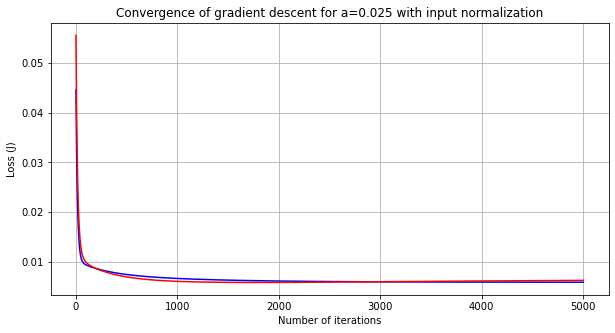

In [40]:
#Plot loss over training interval with Input Normalization
plt.rcParams["figure.figsize"] = (10,5)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent for a={} with input normalization'.format(LEARN_RATE_N))
plt.plot(range(1,ITERATIONS_N+1),lossTN, color='blue')
plt.plot(range(1,ITERATIONS_N+1),lossVN, color='red');


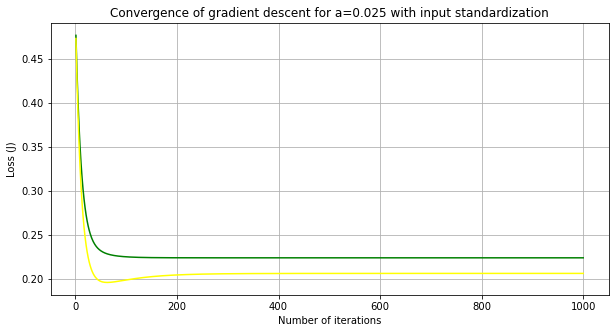

In [41]:
#Plot loss over training interval
plt.rcParams["figure.figsize"] = (10,5)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent for a={} with input standardization'.format(LEARN_RATE_S))
plt.plot(range(1,ITERATIONS_S+1),lossTS, color='green')
plt.plot(range(1,ITERATIONS_S+1),lossVS, color='yellow');

In [42]:
""" Part 2b : numeric and boolean data with normalization and standardization """
%reset -f


In [43]:
#Module Inclusions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn_pandas import DataFrameMapper


In [44]:
#Function to calculate the loss of a model
def get_loss(x, y, theta):
    """x is input data (m x n)
       y is ground truths (m x 1)
       theta is model params (n x 1)"""
    h = x.dot(theta)
    error = np.subtract(h, y)
    sqError = np.square(error)
    sumSqError = np.sum(sqError)
    avgSqError = sumSqError /(2 * len(y)) 
    return avgSqError


In [45]:
#Function to run the gradient descent algorithm
def gradient_descent(xT, yT, theta, a, iterations, xV, yV):
    """xT is input training data (m x n)
       yT is training ground truths (m x 1)
       theta is model params (n x 1)
       a is learn rate (scalar)
       iterations. duh. (scalar)
       xV is input vaidatation data
       yV is validation ground truths """
    tLoss = np.zeros(iterations)
    vLoss = np.zeros(iterations)
    for i in range(iterations):
        h = xT.dot(theta)
        error = np.subtract(h, yT)
        delta = xT.transpose().dot(error)
        grad = delta / len(yT) 
        theta = theta - (a * grad)
        tLoss[i] = get_loss(xT, yT, theta)
        vLoss[i] = get_loss(xV, yV, theta)
    return theta, tLoss, vLoss


In [46]:
#Function to convert Y/N booleans into 1/0 booleans
def yn_bool_convert(val):
    return val.map({ "yes" : 1 , "no" : 0 })


In [47]:
#Read in the CSV into a dataframe
csvData = pd.read_csv("./Housing.csv")

csvCols = len(csvData.columns)
csvRows = len(csvData)

csvData.head(5)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [48]:
#Collect numeric data
dataLabels = ['price','area','bedrooms','bathrooms','stories','parking']
data = csvData[dataLabels]
data


,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [49]:
#Collect boolean data
boolLabels = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
boolData = csvData[boolLabels]
boolData


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [50]:
#Convert Y/N booleans to numerical booleans
boolData = boolData.apply(yn_bool_convert)
boolData


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [51]:
#Join datasets
newdata = pd.concat([data,boolData],axis=1,join='outer')
newdata


,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,13300000,7420,4,2,3,2,1,0,0,0,1,1
1,12250000,8960,4,4,4,3,1,0,0,0,1,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,1,0,1,0,1,1
4,11410000,7420,4,1,2,2,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0


In [52]:
#Split T-set and V-set
np.random.seed(1337)
frameT, frameV = train_test_split(newdata, train_size = 0.8, test_size = 0.2)
n = len(frameT.columns)
m = len(frameT)
mV = len(frameV)
frameT.head(5)


,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
536,1960000,3420,5,1,2,0,0,0,0,0,0,0
420,3360000,4120,2,1,2,0,1,0,0,0,0,0
63,7035000,6360,4,2,3,2,1,0,0,0,1,1
465,3045000,3800,2,1,1,0,1,0,0,0,0,0
277,4305000,10360,2,1,1,1,1,0,0,0,0,1


In [53]:
#Preprocessing
TNScaler = DataFrameMapper([(frameT.columns,MinMaxScaler())])
frameTN = TNScaler.fit_transform(frameT,n)
frameTN = pd.DataFrame(frameTN, index=frameT.index, columns=frameT.columns)
VNScaler = DataFrameMapper([(frameV.columns,MinMaxScaler())])
frameVN = VNScaler.fit_transform(frameV,n)
frameVN = pd.DataFrame(frameVN, index=frameV.index, columns=frameV.columns)
TSScaler = DataFrameMapper([(frameT.columns,StandardScaler())])
frameTS = TSScaler.fit_transform(frameT,n)
frameTS = pd.DataFrame(frameTS, index=frameT.index, columns=frameT.columns)
VSScaler = DataFrameMapper([(frameV.columns,StandardScaler())])
frameVS = VSScaler.fit_transform(frameV,n)
frameVS = pd.DataFrame(frameVS, index=frameV.index, columns=frameV.columns)
print("Normalied Training Set:")
print(frameTN.head(5))
print("Normalized Validation Set:")
print(frameVN.head(5))
print("Standardized Training Set:")
print(frameTS.head(5))
print("Standardized Validation Set:")
print(frameVS.head(5))


Normalied Training Set:
        price      area  bedrooms  bathrooms   stories   parking  mainroad  \
536  0.018182  0.118621       0.8   0.000000  0.333333  0.000000       0.0   
420  0.139394  0.166897       0.2   0.000000  0.333333  0.000000       1.0   
63   0.457576  0.321379       0.6   0.333333  0.666667  0.666667       1.0   
465  0.112121  0.144828       0.2   0.000000  0.000000  0.000000       1.0   
277  0.221212  0.597241       0.2   0.000000  0.000000  0.333333       1.0   

     guestroom  basement  hotwaterheating  airconditioning  prefarea  
536        0.0       0.0              0.0              0.0       0.0  
420        0.0       0.0              0.0              0.0       0.0  
63         0.0       0.0              0.0              1.0       1.0  
465        0.0       0.0              0.0              0.0       0.0  
277        0.0       0.0              0.0              0.0       1.0  
Normalized Validation Set:
        price      area  bedrooms  bathrooms   stories

In [54]:
#Break data into X,Y sets
YvN = frameVN.pop('price')
XvN = frameVN
YN = frameTN.pop('price')
XN = frameTN
YvS = frameVS.pop('price')
XvS = frameVS
YS = frameTS.pop('price')
XS = frameTS


In [55]:
#Format Data For Gradient Descent
YvN = YvN.values[:].reshape([mV,1])
XvN = np.hstack((np.ones((mV,1)), XvN.values[:,:].reshape([mV,n-1])))
YN = YN.values[:].reshape([m,1])
XN = np.hstack((np.ones((m,1)), XN.values[:,:].reshape([m,n-1])))
YvS = YvS.values[:].reshape([mV,1])
XvS = np.hstack((np.ones((mV,1)), XvS.values[:,:].reshape([mV,n-1])))
YS = YS.values[:].reshape([m,1])
XS = np.hstack((np.ones((m,1)), XS.values[:,:].reshape([m,n-1])))


In [56]:
#set up gradient descent
LEARN_RATE_N = 0.025
ITERATIONS_N = 5000
LEARN_RATE_S = 0.025
ITERATIONS_S = 1000
#init theta
theta = np.zeros((n,1))
theta


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [57]:
#Perform the Gradient Descent on the data
thetaN, lossTN, lossVN = gradient_descent(XN,YN,theta,LEARN_RATE_N,ITERATIONS_N,XvN,YvN)
print("Converged Training Loss J for normalized set = {:.3f}".format(lossTN[-1]))
print("Final Validation Loss J for normalized set = {:.3f}".format(lossVN[-1]))

thetaS, lossTS, lossVS = gradient_descent(XS,YS,theta,LEARN_RATE_S,ITERATIONS_S,XvS,YvS)
print("Converged Training Loss J for normalized set = {:.3f}".format(lossTS[-1]))
print("Final Validation Loss J for normalized set = {:.3f}".format(lossVS[-1]))


Converged Training Loss J for normalized set = 0.004
Final Validation Loss J for normalized set = 0.005
Converged Training Loss J for normalized set = 0.168
Final Validation Loss J for normalized set = 0.154


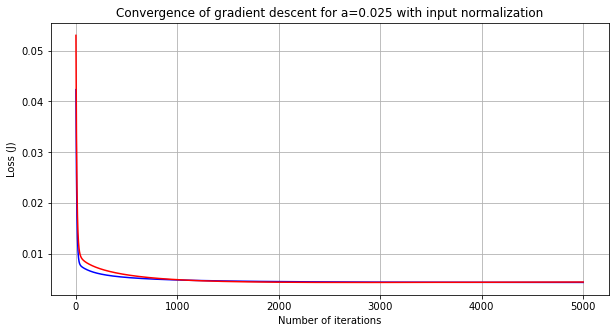

In [58]:
#Plot loss over training interval with Input Normalization
plt.rcParams["figure.figsize"] = (10,5)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent for a={} with input normalization'.format(LEARN_RATE_N))
plt.plot(range(1,ITERATIONS_N+1),lossTN, color='blue')
plt.plot(range(1,ITERATIONS_N+1),lossVN, color='red');


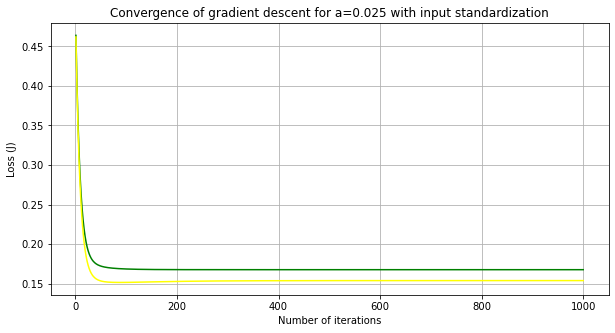

In [59]:
#Plot loss over training interval
plt.rcParams["figure.figsize"] = (10,5)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent for a={} with input standardization'.format(LEARN_RATE_S))
plt.plot(range(1,ITERATIONS_S+1),lossTS, color='green')
plt.plot(range(1,ITERATIONS_S+1),lossVS, color='yellow');


In [60]:
""" Part 3a : numeric data with input cleaning and parameter penalization """
%reset -f


' Part 3a : numeric data with input cleaning and parameter penalization '

In [61]:
#Module Inclusions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn_pandas import DataFrameMapper


In [62]:
#Function to calculate the loss of a model
def get_loss(x, y, theta):
    """x is input data (m x n)
       y is ground truths (m x 1)
       theta is model params (n x 1)"""
    h = x.dot(theta)
    error = np.subtract(h, y)
    sqError = np.square(error)
    sumSqError = np.sum(sqError)
    avgSqError = sumSqError /(2 * len(y)) 
    return avgSqError


In [63]:
#Function to run the gradient descent algorithm
def gradient_descent(xT, yT, theta, a, lam, iterations, xV, yV):
    """xT is input training data (m x n)
       yT is training ground truths (m x 1)
       theta is model params (n x 1)
       a is learn rate (scalar)
       lam is parameter penalty (scalar)
       iterations. duh. (scalar)
       xV is input vaidatation data
       yV is validation ground truths """
    tLoss = np.zeros(iterations)
    vLoss = np.zeros(iterations)
    m = len(yT)
    for i in range(iterations):
        h = xT.dot(theta)
        error = np.subtract(h, yT)
        delta = xT.transpose().dot(error)
        grad = delta / m 
        theta = (theta * (1 - (a * lam / m))) - (a * grad)
        tLoss[i] = get_loss(xT, yT, theta)
        vLoss[i] = get_loss(xV, yV, theta)
    return theta, tLoss, vLoss


In [64]:
#Read in the CSV into a dataframe
csvData = pd.read_csv("./Housing.csv")

csvCols = len(csvData.columns)
csvRows = len(csvData)

csvData.head(5)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [65]:
#Collect Data
dataLabels = ['price','area','bedrooms','bathrooms','stories','parking']
data = csvData[dataLabels]
data.head(5)


,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [66]:
#Split T-set and V-set
np.random.seed(1337)
frameT, frameV = train_test_split(data, train_size = 0.8, test_size = 0.2)
n = len(frameT.columns)
m = len(frameT)
mV = len(frameV)
frameT.head(5)


,price,area,bedrooms,bathrooms,stories,parking
536,1960000,3420,5,1,2,0
420,3360000,4120,2,1,2,0
63,7035000,6360,4,2,3,2
465,3045000,3800,2,1,1,0
277,4305000,10360,2,1,1,1


In [67]:
#Preprocessing
TNScaler = DataFrameMapper([(frameT.columns,MinMaxScaler())])
frameTN = TNScaler.fit_transform(frameT,n)
frameTN = pd.DataFrame(frameTN, index=frameT.index, columns=frameT.columns)
VNScaler = DataFrameMapper([(frameV.columns,MinMaxScaler())])
frameVN = VNScaler.fit_transform(frameV,n)
frameVN = pd.DataFrame(frameVN, index=frameV.index, columns=frameV.columns)
TSScaler = DataFrameMapper([(frameT.columns,StandardScaler())])
frameTS = TSScaler.fit_transform(frameT,n)
frameTS = pd.DataFrame(frameTS, index=frameT.index, columns=frameT.columns)
VSScaler = DataFrameMapper([(frameV.columns,StandardScaler())])
frameVS = VSScaler.fit_transform(frameV,n)
frameVS = pd.DataFrame(frameVS, index=frameV.index, columns=frameV.columns)
print("Normalied Training Set:")
print(frameTN.head(5))
print("Normalized Validation Set:")
print(frameVN.head(5))
print("Standardized Training Set:")
print(frameTS.head(5))
print("Standardized Validation Set:")
print(frameVS.head(5))


Normalied Training Set:
        price      area  bedrooms  bathrooms   stories   parking
536  0.018182  0.118621       0.8   0.000000  0.333333  0.000000
420  0.139394  0.166897       0.2   0.000000  0.333333  0.000000
63   0.457576  0.321379       0.6   0.333333  0.666667  0.666667
465  0.112121  0.144828       0.2   0.000000  0.000000  0.000000
277  0.221212  0.597241       0.2   0.000000  0.000000  0.333333
Normalized Validation Set:
        price      area  bedrooms  bathrooms   stories   parking
326  0.214047  0.216929       0.6        0.0  0.000000  0.000000
449  0.133779  0.000000       0.4        0.0  0.333333  0.000000
224  0.287625  0.760581       0.2        0.0  0.000000  0.666667
140  0.381271  0.367452       0.4        0.5  1.000000  0.000000
13   0.715719  0.163804       0.6        0.5  0.333333  0.666667
Standardized Training Set:
        price      area  bedrooms  bathrooms   stories   parking
536 -1.487025 -0.795113  2.857902  -0.555867  0.236492 -0.810745
420 -0.74152

In [68]:
#Break data into X,Y sets
YvN = frameVN.pop('price')
XvN = frameVN
YN = frameTN.pop('price')
XN = frameTN
YvS = frameVS.pop('price')
XvS = frameVS
YS = frameTS.pop('price')
XS = frameTS


In [69]:
#Format Data For Gradient Descent
YvN = YvN.values[:].reshape([mV,1])
XvN = np.hstack((np.ones((mV,1)), XvN.values[:,:].reshape([mV,n-1])))
YN = YN.values[:].reshape([m,1])
XN = np.hstack((np.ones((m,1)), XN.values[:,:].reshape([m,n-1])))
YvS = YvS.values[:].reshape([mV,1])
XvS = np.hstack((np.ones((mV,1)), XvS.values[:,:].reshape([mV,n-1])))
YS = YS.values[:].reshape([m,1])
XS = np.hstack((np.ones((m,1)), XS.values[:,:].reshape([m,n-1])))


In [70]:
#set up gradient descent
LEARN_RATE_N = 0.025
ITERATIONS_N = 5000
PENALTY_N = 1
LEARN_RATE_S = 0.025
ITERATIONS_S = 1000
PENALTY_S = 1
#init theta
theta = np.zeros((n,1))
theta


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [71]:
#Perform the Gradient Descent on the data
thetaN, lossTN, lossVN = gradient_descent(XN,YN,theta,LEARN_RATE_N,PENALTY_N,ITERATIONS_N,XvN,YvN)
print("Converged Training Loss J for normalized set = {:.3f}".format(lossTN[-1]))
print("Final Validation Loss J for normalized set = {:.3f}".format(lossVN[-1]))

thetaS, lossTS, lossVS = gradient_descent(XS,YS,theta,LEARN_RATE_S,PENALTY_S,ITERATIONS_S,XvS,YvS)
print("Converged Training Loss J for normalized set = {:.3f}".format(lossTS[-1]))
print("Final Validation Loss J for normalized set = {:.3f}".format(lossVS[-1]))


Converged Training Loss J for normalized set = 0.006
Final Validation Loss J for normalized set = 0.006
Converged Training Loss J for normalized set = 0.224
Final Validation Loss J for normalized set = 0.206


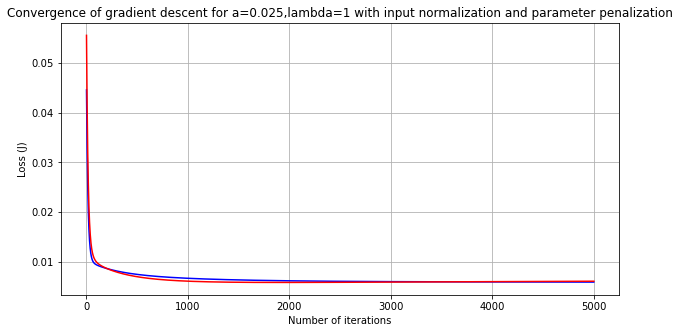

In [72]:
#Plot loss over training interval with Input Normalization
plt.rcParams["figure.figsize"] = (10,5)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title(
    'Convergence of gradient descent for a={},lambda={} with input normalization and parameter penalization'
    .format(LEARN_RATE_N,PENALTY_N))
plt.plot(range(1,ITERATIONS_N+1),lossTN, color='blue')
plt.plot(range(1,ITERATIONS_N+1),lossVN, color='red');


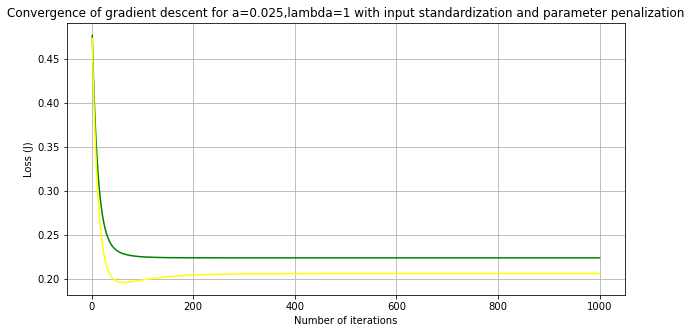

In [73]:
#Plot loss over training interval
plt.rcParams["figure.figsize"] = (10,5)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title(
    'Convergence of gradient descent for a={},lambda={} with input standardization and parameter penalization'
    .format(LEARN_RATE_S,PENALTY_S))
plt.plot(range(1,ITERATIONS_S+1),lossTS, color='green')
plt.plot(range(1,ITERATIONS_S+1),lossVS, color='yellow');

In [74]:
""" Part 3b : numeric and boolean data with input cleaning and parameter penalization """
%reset -f


' Part 3b : numeric and boolean data with input cleaning and parameter penalization '

In [75]:
#Module Inclusions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn_pandas import DataFrameMapper


In [76]:
#Function to calculate the loss of a model
def get_loss(x, y, theta):
    """x is input data (m x n)
       y is ground truths (m x 1)
       theta is model params (n x 1)"""
    h = x.dot(theta)
    error = np.subtract(h, y)
    sqError = np.square(error)
    sumSqError = np.sum(sqError)
    avgSqError = sumSqError /(2 * len(y)) 
    return avgSqError


In [77]:
#Function to run the gradient descent algorithm
def gradient_descent(xT, yT, theta, a, lam, iterations, xV, yV):
    """xT is input training data (m x n)
       yT is training ground truths (m x 1)
       theta is model params (n x 1)
       a is learn rate (scalar)
       lam is parameter penalty (scalar)
       iterations. duh. (scalar)
       xV is input vaidatation data
       yV is validation ground truths """
    tLoss = np.zeros(iterations)
    vLoss = np.zeros(iterations)
    m = len(yT)
    for i in range(iterations):
        h = xT.dot(theta)
        error = np.subtract(h, yT)
        delta = xT.transpose().dot(error)
        grad = delta / m 
        theta = (theta * (1 - (a * lam / m))) - (a * grad)
        tLoss[i] = get_loss(xT, yT, theta)
        vLoss[i] = get_loss(xV, yV, theta)
    return theta, tLoss, vLoss


In [78]:
#Read in the CSV into a dataframe
csvData = pd.read_csv("./Housing.csv")

csvCols = len(csvData.columns)
csvRows = len(csvData)

csvData.head(5)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [79]:
#Collect Data
dataLabels = ['price','area','bedrooms','bathrooms','stories','parking']
data = csvData[dataLabels]
data.head(5)


,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [80]:
#Collect boolean data
boolLabels = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
boolData = csvData[boolLabels]
boolData


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [81]:
#Convert Y/N booleans to numerical booleans
boolData = boolData.apply(yn_bool_convert)
boolData


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [82]:
#Join datasets
newdata = pd.concat([data,boolData],axis=1,join='outer')
newdata


,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,13300000,7420,4,2,3,2,1,0,0,0,1,1
1,12250000,8960,4,4,4,3,1,0,0,0,1,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,1,0,1,0,1,1
4,11410000,7420,4,1,2,2,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0


In [83]:
#Split T-set and V-set
np.random.seed(1337)
frameT, frameV = train_test_split(newdata, train_size = 0.8, test_size = 0.2)
n = len(frameT.columns)
m = len(frameT)
mV = len(frameV)
frameT.head(5)


,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
536,1960000,3420,5,1,2,0,0,0,0,0,0,0
420,3360000,4120,2,1,2,0,1,0,0,0,0,0
63,7035000,6360,4,2,3,2,1,0,0,0,1,1
465,3045000,3800,2,1,1,0,1,0,0,0,0,0
277,4305000,10360,2,1,1,1,1,0,0,0,0,1


In [84]:
#Preprocessing
TNScaler = DataFrameMapper([(frameT.columns,MinMaxScaler())])
frameTN = TNScaler.fit_transform(frameT,n)
frameTN = pd.DataFrame(frameTN, index=frameT.index, columns=frameT.columns)
VNScaler = DataFrameMapper([(frameV.columns,MinMaxScaler())])
frameVN = VNScaler.fit_transform(frameV,n)
frameVN = pd.DataFrame(frameVN, index=frameV.index, columns=frameV.columns)
TSScaler = DataFrameMapper([(frameT.columns,StandardScaler())])
frameTS = TSScaler.fit_transform(frameT,n)
frameTS = pd.DataFrame(frameTS, index=frameT.index, columns=frameT.columns)
VSScaler = DataFrameMapper([(frameV.columns,StandardScaler())])
frameVS = VSScaler.fit_transform(frameV,n)
frameVS = pd.DataFrame(frameVS, index=frameV.index, columns=frameV.columns)
print("Normalied Training Set:")
print(frameTN.head(5))
print("Normalized Validation Set:")
print(frameVN.head(5))
print("Standardized Training Set:")
print(frameTS.head(5))
print("Standardized Validation Set:")
print(frameVS.head(5))


Normalied Training Set:
        price      area  bedrooms  bathrooms   stories   parking  mainroad  \
536  0.018182  0.118621       0.8   0.000000  0.333333  0.000000       0.0   
420  0.139394  0.166897       0.2   0.000000  0.333333  0.000000       1.0   
63   0.457576  0.321379       0.6   0.333333  0.666667  0.666667       1.0   
465  0.112121  0.144828       0.2   0.000000  0.000000  0.000000       1.0   
277  0.221212  0.597241       0.2   0.000000  0.000000  0.333333       1.0   

     guestroom  basement  hotwaterheating  airconditioning  prefarea  
536        0.0       0.0              0.0              0.0       0.0  
420        0.0       0.0              0.0              0.0       0.0  
63         0.0       0.0              0.0              1.0       1.0  
465        0.0       0.0              0.0              0.0       0.0  
277        0.0       0.0              0.0              0.0       1.0  
Normalized Validation Set:
        price      area  bedrooms  bathrooms   stories

In [85]:
#Break data into X,Y sets
YvN = frameVN.pop('price')
XvN = frameVN
YN = frameTN.pop('price')
XN = frameTN
YvS = frameVS.pop('price')
XvS = frameVS
YS = frameTS.pop('price')
XS = frameTS


In [86]:
#Format Data For Gradient Descent
YvN = YvN.values[:].reshape([mV,1])
XvN = np.hstack((np.ones((mV,1)), XvN.values[:,:].reshape([mV,n-1])))
YN = YN.values[:].reshape([m,1])
XN = np.hstack((np.ones((m,1)), XN.values[:,:].reshape([m,n-1])))
YvS = YvS.values[:].reshape([mV,1])
XvS = np.hstack((np.ones((mV,1)), XvS.values[:,:].reshape([mV,n-1])))
YS = YS.values[:].reshape([m,1])
XS = np.hstack((np.ones((m,1)), XS.values[:,:].reshape([m,n-1])))


In [87]:
#set up gradient descent
LEARN_RATE_N = 0.025
ITERATIONS_N = 5000
PENALTY_N = 1
LEARN_RATE_S = 0.025
ITERATIONS_S = 1000
PENALTY_S = 1
#init theta
theta = np.zeros((n,1))
theta


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [88]:
#Perform the Gradient Descent on the data
thetaN, lossTN, lossVN = gradient_descent(XN,YN,theta,LEARN_RATE_N,PENALTY_N,ITERATIONS_N,XvN,YvN)
print("Converged Training Loss J for normalized set = {:.3f}".format(lossTN[-1]))
print("Final Validation Loss J for normalized set = {:.3f}".format(lossVN[-1]))

thetaS, lossTS, lossVS = gradient_descent(XS,YS,theta,LEARN_RATE_S,PENALTY_S,ITERATIONS_S,XvS,YvS)
print("Converged Training Loss J for normalized set = {:.3f}".format(lossTS[-1]))
print("Final Validation Loss J for normalized set = {:.3f}".format(lossVS[-1]))


Converged Training Loss J for normalized set = 0.004
Final Validation Loss J for normalized set = 0.004
Converged Training Loss J for normalized set = 0.168
Final Validation Loss J for normalized set = 0.154


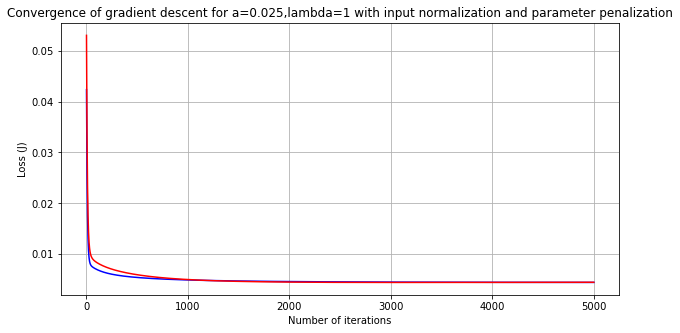

In [89]:
#Plot loss over training interval with Input Normalization
plt.rcParams["figure.figsize"] = (10,5)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title(
    'Convergence of gradient descent for a={},lambda={} with input normalization and parameter penalization'
    .format(LEARN_RATE_N,PENALTY_N))
plt.plot(range(1,ITERATIONS_N+1),lossTN, color='blue')
plt.plot(range(1,ITERATIONS_N+1),lossVN, color='red');


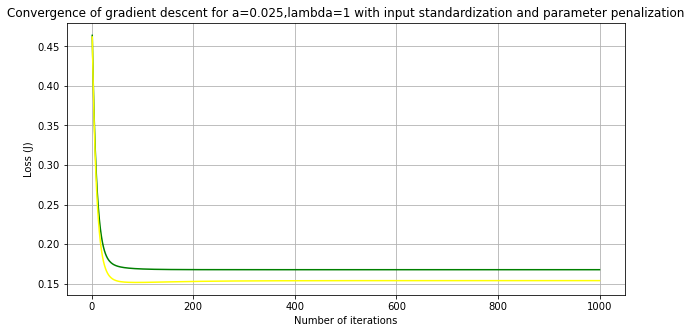

In [90]:
#Plot loss over training interval
plt.rcParams["figure.figsize"] = (10,5)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title(
    'Convergence of gradient descent for a={},lambda={} with input standardization and parameter penalization'
    .format(LEARN_RATE_S,PENALTY_S))
plt.plot(range(1,ITERATIONS_S+1),lossTS, color='green')
plt.plot(range(1,ITERATIONS_S+1),lossVS, color='yellow');
